In [3]:
import distract
import finetune
import importlib
import matplotlib.pyplot as plt
import numpy as np
import torch

In [4]:
importlib.reload(finetune)
finetune.CLASSIFIER_NAME = 'resnet'
finetune.FEATURE_EXTRACT = False
finetune.DATASET = 'StanfordCars'
classifier = finetune.initialize_model()
# classifier, hist = finetune.finetune_model(classifier)

In [7]:
importlib.reload(distract)
distract.DISTRACTOR_NUM_EPOCHS = 15
distractor = distract.initialize_distractor(classifier)
print(distractor)

GumbelDistractor(
  (cnns): ModuleList(
    (0): Conv2d(1, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): Conv2d(1, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (2): Conv2d(1, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): Conv2d(1, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  )
)


In [ ]:
history = distract.train_distractor(distractor, classifier)

15


epoch: 0, train:   9%|▉         | 91/1018 [00:59<10:20,  1.49it/s, avg_baseline_loss=2.2447, avg_distractor_loss=2.2541, avg_parameter_grad=+0.00032878, current_parameter_grad=-6.8186e-05, avg_parameter_value=-0.079609]

In [4]:
history = distract.train_distractor(distractor, classifier)

15


epoch: 0, val:  87%|████████▋ | 364/417 [06:28<00:56,  1.07s/it, avg_baseline_loss=0.30863, avg_distractor_loss=0.27531]


KeyboardInterrupt: 

In [4]:
history = distract.train_distractor(distractor, classifier)

15


epoch: 6, val:   3%|▎         | 14/417 [00:06<02:58,  2.26it/s, avg_baseline_loss=0.3069, avg_distractor_loss=0.26471] 


KeyboardInterrupt: 

In [1]:
distract.plot_loss_history(history)

NameError: name 'distract' is not defined

epoch: 0, val: 100%|██████████| 417/417 [02:00<00:00,  3.46it/s, avg_baseline_loss=0.0067828, avg_distractor_loss=0.0067907]


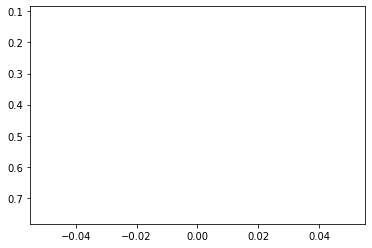

epoch: 1, val: 100%|██████████| 417/417 [02:00<00:00,  3.46it/s, avg_baseline_loss=0.0067797, avg_distractor_loss=0.0067884]


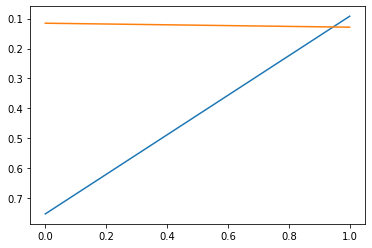

epoch: 2, val: 100%|██████████| 417/417 [02:04<00:00,  3.34it/s, avg_baseline_loss=0.006784, avg_distractor_loss=0.006791]  


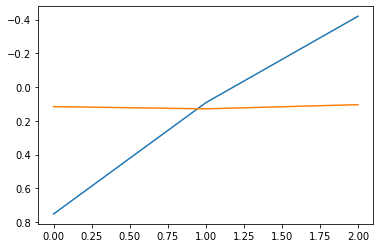

epoch: 3, val: 100%|██████████| 417/417 [02:05<00:00,  3.34it/s, avg_baseline_loss=0.0067844, avg_distractor_loss=0.0071092]


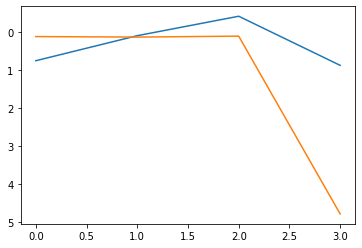

epoch: 4, val: 100%|██████████| 417/417 [02:05<00:00,  3.33it/s, avg_baseline_loss=0.0067815, avg_distractor_loss=0.0067893]


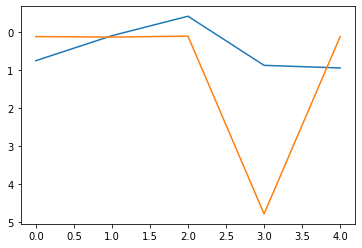

In [5]:
importlib.reload(distract)

history = distract.train_distractor(distractor, classifier)

In [17]:
next_baseline_loss, next_distractor_loss = distract.train_distractor(distractor, classifier)

100%|██████████| 417/417 [02:29<00:00,  2.79it/s, running_avg_baseline_loss=0.256, running_avg_distractor_loss=0.194]


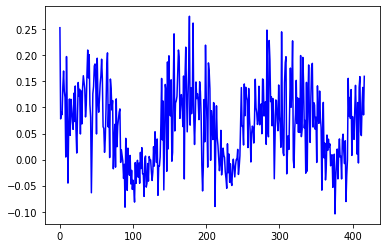

In [18]:
plt.plot(np.array([l.cpu().item() for l in next_baseline_loss['train']]) - np.array([l.cpu().item() for l in next_distractor_loss['train']]), 'b')
# plt.plot([l.cpu().data.numpy() for l in distractor_loss['train']], 'r')
# plt.plot(distractor_loss, 'r')
plt.show()